In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:

X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[6]

In [ ]:
single_image.shape

(28, 28)

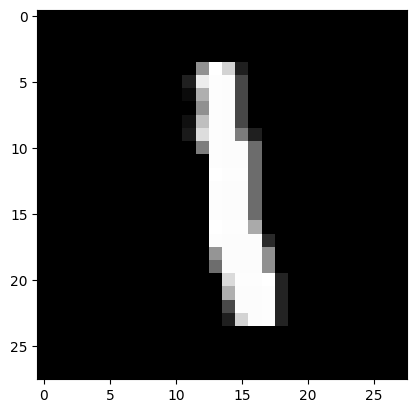

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:

y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:

X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:

type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

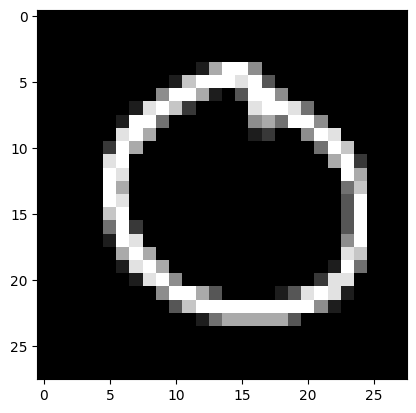

In [ ]:
single_image = X_train[68]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(7,7),activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(75,activation="relu"))
model.add(layers.Dense(10,activation="softmax"))

In [ ]:

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        1600      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 11, 11, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3872)              0         
                                                                 
 dense_4 (Dense)             (None, 75)                290475    
                                                                 
 dense_5 (Dense)             (None, 10)                760       
                                                                 
Total params: 292835 (1.12 MB)
Trainable params: 292835 (1.12 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 46s 47ms/step - loss: 0.1648 - accuracy: 0.9515 - val_loss: 0.0741 - val_accuracy: 0.9752
Epoch 2/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0524 - accuracy: 0.9843 - val_loss: 0.0421 - val_accuracy: 0.9865
Epoch 3/5
938/938 [==============================] - 39s 42ms/step - loss: 0.0355 - accuracy: 0.9895 - val_loss: 0.0442 - val_accuracy: 0.9858
Epoch 4/5
938/938 [==============================] - 38s 40ms/step - loss: 0.0276 - accuracy: 0.9909 - val_loss: 0.0348 - val_accuracy: 0.9887
Epoch 5/5
938/938 [==============================] - 36s 38ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.0358 - val_accuracy: 0.9882


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:

metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.164828,0.951500,0.074111,0.9752
1,0.052397,0.984317,0.042122,0.9865
2,0.035485,0.989500,0.044199,0.9858
3,0.027641,0.990867,0.034779,0.9887
4,0.020513,0.993433,0.035838,0.9882


<Axes: >

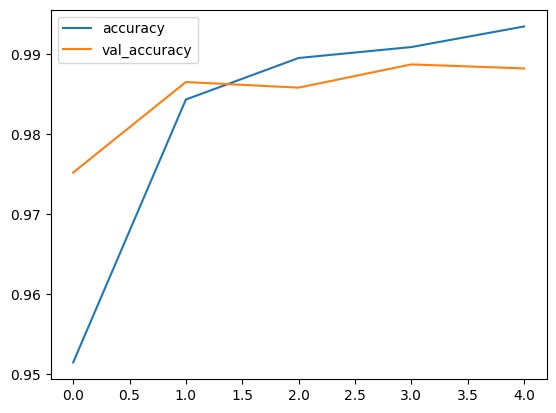

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

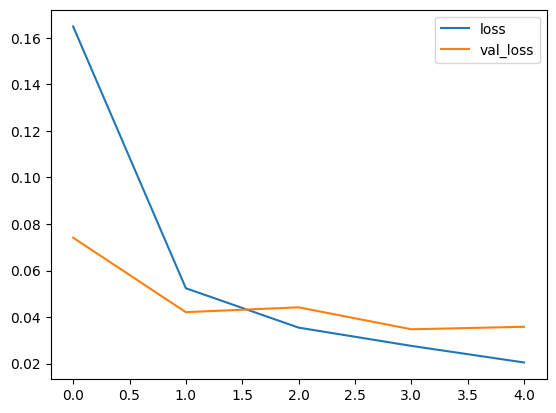

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 6ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 976    0    0    0    0    0    1    1    2    0]
 [   0 1132    2    0    0    0    0    1    0    0]
 [   2    3 1014    3    2    0    0    7    1    0]
 [   0    0    0 1006    0    3    0    0    1    0]
 [   0    0    1    0  978    0    1    0    0    2]
 [   2    0    0    9    0  880    1    0    0    0]
 [   5    2    0    1    1    5  944    0    0    0]
 [   1    0    4    0    0    0    0 1021    1    1]
 [   5    1    4    5    1    3    2    4  947    2]
 [   0    1    0    3    7    5    0    8    1  984]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      0.98      0.99      1032
           3       0.98      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [ ]:
img = image.load_img('imagefive.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('imagefive.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 26ms/step


In [ ]:
print(x_single_prediction)

[2]


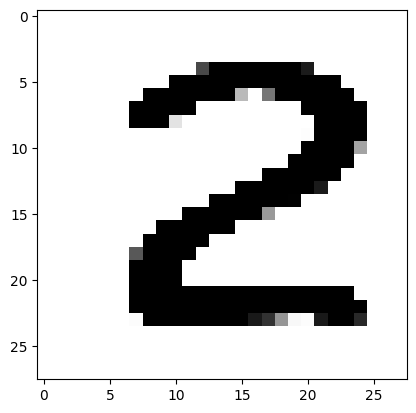

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [ ]:
print(x_single_prediction)

[2]
